One neuron net, that finds solution for line (linear equation):  
$$y=2x+1$$  

inputs: -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5  
outputs: -9, -7, -5, -3, -1, 1, 3, 5, 7, 9, 11

In [0]:
# only for the case, when you execute it in google colab:
# !pip install torch

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

print(torch.__version__)

1.3.1+cu100


In [3]:
inputs = torch.tensor([[-5.], [-4.], [-3.], [-2.], [-1.], [0.], [1.], [2.], [3.], [4.], [5.]], dtype=torch.float32)
outputs = inputs.mul(2).add(1)
inputs, outputs

(tensor([[-5.],
         [-4.],
         [-3.],
         [-2.],
         [-1.],
         [ 0.],
         [ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.]]), tensor([[-9.],
         [-7.],
         [-5.],
         [-3.],
         [-1.],
         [ 1.],
         [ 3.],
         [ 5.],
         [ 7.],
         [ 9.],
         [11.]]))

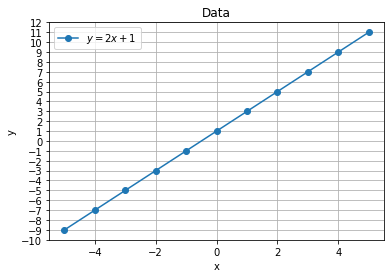

In [4]:
fig, ax = plt.subplots()

ax.plot(inputs, outputs, marker='o', label='$y=2x+1$')

ax.set_title('Data')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.legend()
ax.grid(True)

plt.show()

Data have to be normalized to be in range from 0 to 1, otherwise the negative value will cause untrainable weight with combination with ReLU activation function:  
*Normalization equation for each element x from tensot t:*  
$$\frac{x-t_{min}}{t_{max}-t_{min}}$$

With normalization the line equations becomes:  
$$y=1x+0$$  
*1 = expected weight*  
*0 = expected bias*  

In [0]:
def normalize(tensor):
    '''normalize each element x from tensor to be between 0 and 1: (x-min)/(max-min)'''
    max = torch.max(tensor)
    min = torch.min(tensor)
    
    normed_tensor = tensor.sub(min).div(max-min)
    
    return normed_tensor

In [6]:
inputs_normed = normalize(inputs)
outputs_normed = normalize(outputs)
inputs_normed, outputs_normed

(tensor([[0.0000],
         [0.1000],
         [0.2000],
         [0.3000],
         [0.4000],
         [0.5000],
         [0.6000],
         [0.7000],
         [0.8000],
         [0.9000],
         [1.0000]]), tensor([[0.0000],
         [0.1000],
         [0.2000],
         [0.3000],
         [0.4000],
         [0.5000],
         [0.6000],
         [0.7000],
         [0.8000],
         [0.9000],
         [1.0000]]))

In [7]:
training_inputs, test_inputs = torch.split(inputs_normed, 7, dim=0)
training_inputs, test_inputs

(tensor([[0.0000],
         [0.1000],
         [0.2000],
         [0.3000],
         [0.4000],
         [0.5000],
         [0.6000]]), tensor([[0.7000],
         [0.8000],
         [0.9000],
         [1.0000]]))

In [8]:
training_outputs, test_outputs = torch.split(outputs_normed, 7, dim=0)
training_outputs, test_outputs

(tensor([[0.0000],
         [0.1000],
         [0.2000],
         [0.3000],
         [0.4000],
         [0.5000],
         [0.6000]]), tensor([[0.7000],
         [0.8000],
         [0.9000],
         [1.0000]]))

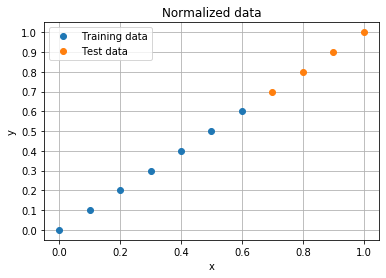

In [9]:
fig, ax = plt.subplots()

ax.plot(training_inputs, training_outputs, marker='o', linestyle='', label='Training data')
ax.plot(test_inputs, test_outputs, marker='o', linestyle='', label='Test data')

ax.set_title('Normalized data')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.yaxis.set_major_locator(MultipleLocator(0.1))

ax.legend()
ax.grid(True)

plt.show()

1 fully connected (dense) layer with 1 input  
optimizer: Stochastic gradient descent  
loss function: Mean squared error https://en.wikipedia.org/wiki/Mean_squared_error  
$$\frac{1}{n}\sum_{i=1}^n (x_i-\overline{x_i})^2$$  


In [0]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc = nn.Linear(in_features=1, out_features=1)
        
        
    def forward(self, t):
        t = self.fc(t)
        t = F.relu(t)
        return t

In [11]:
model = Model()

optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(10):
    total_loss = 0

    for input, output in zip(training_inputs,training_outputs):
        
        preds = model(input)
        loss = F.mse_loss(preds, output)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f'epoch: {epoch} loss: {total_loss:.2f}')

epoch: 0 loss: 1.91
epoch: 1 loss: 1.40
epoch: 2 loss: 1.04
epoch: 3 loss: 0.76
epoch: 4 loss: 0.57
epoch: 5 loss: 0.42
epoch: 6 loss: 0.31
epoch: 7 loss: 0.23
epoch: 8 loss: 0.17
epoch: 9 loss: 0.13


In [12]:
predictions = model(test_inputs).detach().numpy()
predictions

array([[0.75239444],
       [0.8351246 ],
       [0.9178548 ],
       [1.000585  ]], dtype=float32)

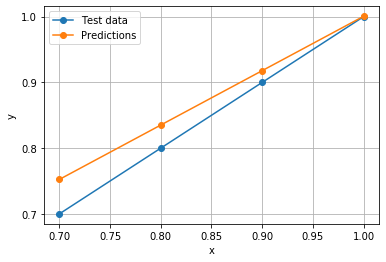

In [13]:
fig, ax = plt.subplots()

ax.plot(test_inputs, test_outputs, marker='o', label='Test data')
ax.plot(test_inputs, predictions, marker='o', label='Predictions')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.legend()
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.grid(True)

plt.show()

In [14]:
weight = model.fc.weight.item()
bias = model.fc.bias.item()
weight, bias

(0.8273014426231384, 0.17328348755836487)